In [9]:
import matplotlib.pyplot as plt
import numpy             as np
import multiprocessing   as mp

import gym
import Portfolio_Gym
import DQN_I

In [2]:
# This notebook facilitates the application of the DQN agent to the 
# historical environment.

In [13]:
def Run(A):
    np.random.seed(A)
    Network_Hypers = {"Learning Rate" : 0.075,
                      "Epoch"         : 5,
                      "Network Size"  : [32, 16],
                      "Activation"    : "Sigmoid",
                      "Alpha"         : 0.015}

    Env = gym.make('Historical_Daily-v0')
    Env.Set_Params(Risk_Aversion = 1,  Episode_Length = 200,  Max_Leverage  = 5,
                   Min_Leverage = -5,  Validation_Frac = 0.3, Intermediate_Reward = True)

    myDQN = DQN_I.DQN(Env, 11, Network_Hypers, Batch_Size = 2048, Retrain_Frequency = 2, 
                      Gamma = 0.9992, Epsilon_Range = [1, 0.1], Epsilon_Anneal = 0.9, 
                      Async_Enabled = False)


    print("The number of obs in Training set: " + str(int(Env.Data.shape[0] * 0.7)))
    myDQN.Train(1000)
    Results = Env.Validate(100, myDQN)

    f, ax = plt.subplots(1,1, figsize = (10,10))
    ax.scatter(np.arange(len(Results[0])), Results[0], label = 'DQN', color = 'lightskyblue')
    ax.scatter(np.arange(len(Results[1])), Results[1], label = 'RFree', color = 'mediumvioletred')
    ax.scatter(np.arange(len(Results[2])), Results[2], label = 'Merton', color = 'darkblue')
    
    ax.set_title(str(A))
    ax.set_ylabel("Utility")
    ax.set_xlabel("Validation Ep.")
    ax.legend()
    plt.show()

    print("")
    print(str(A) + "      DQN Mean: " +  str(round(np.mean(Results[0]), 4)) + ", Std: " + str(round(np.std(Results[0]), 4))) 
    print(str(A) + "Risk Free Mean: " +  str(round(np.mean(Results[1]), 4)) + ", Std: " + str(round(np.std(Results[1]), 4)))
    print(str(A) + "   Merton Mean: " +  str(round(np.mean(Results[2]), 4)) + ", Std: " + str(round(np.std(Results[2]), 4)))
    print("")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


The number of obs in Training set: 11998
The number of obs in Training set: 11998
The number of obs in Training set: 11998


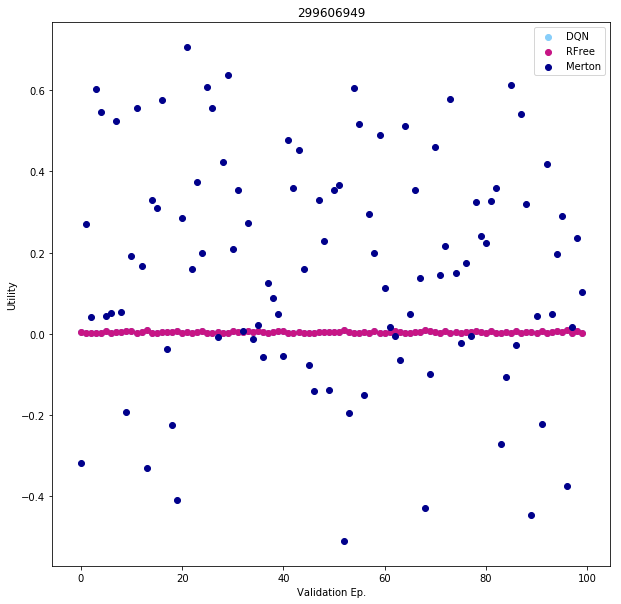


299606949      DQN Mean: 0.0039, Std: 0.0018
299606949Risk Free Mean: 0.0039, Std: 0.0018
299606949   Merton Mean: 0.1644, Std: 0.2786



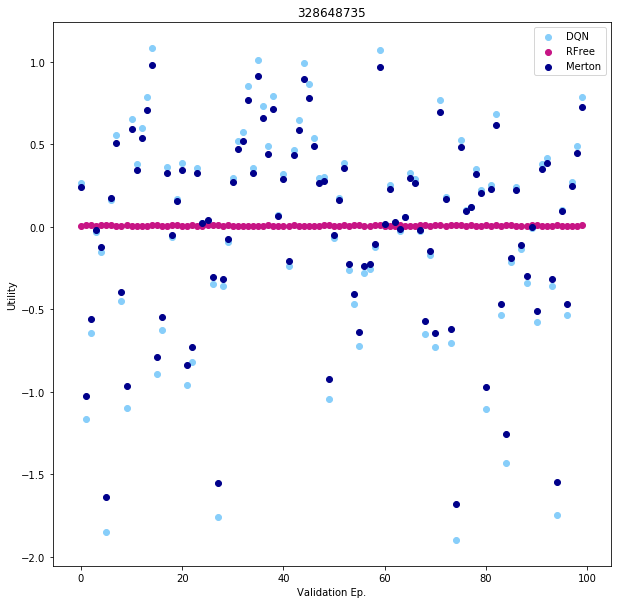


328648735      DQN Mean: -0.0158, Std: 0.6514
328648735Risk Free Mean: 0.007, Std: 0.0028
328648735   Merton Mean: -0.0054, Std: 0.5803



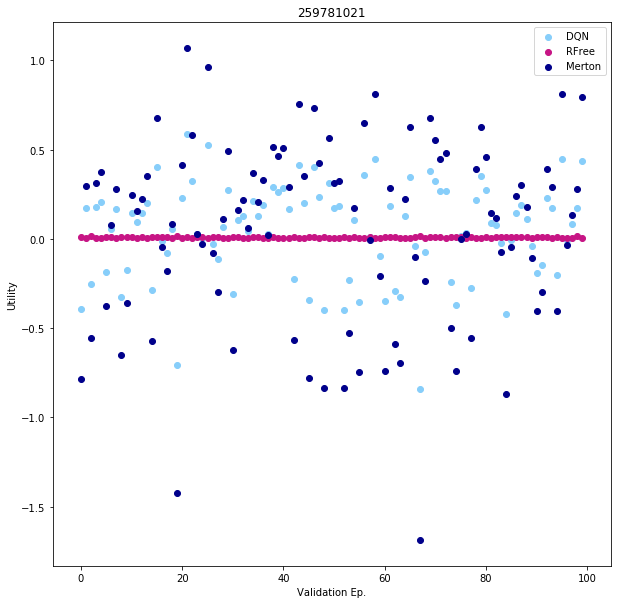


259781021      DQN Mean: 0.0468, Std: 0.2664
259781021Risk Free Mean: 0.0078, Std: 0.0028
259781021   Merton Mean: 0.0485, Std: 0.5151

CPU times: user 353 ms, sys: 130 ms, total: 483 ms
Wall time: 13min 28s


In [14]:
%%time

with mp.Pool(mp.cpu_count()) as pool:
    _ = pool.map(Run, np.random.randint(0, int(1e9), 3))